In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wfdb
from wfdb import processing

from gc import collect as collect_garbage
from psutil import virtual_memory
from os import scandir

In [2]:
%matplotlib widget

In [3]:
collect_garbage()
virtual_memory()

svmem(total=12655771648, available=7988166656, percent=36.9, used=4667604992, free=7988166656)

In [ ]:
# Figure 8: a stream of QRS complexes

In [ ]:
# LOAD IN THE SIGNAL
df = pd.read_csv("C:/Users/aidan/Box/Deidentified-Raw-Waveforms/raw_waves_data_1a.csv", usecols=["time", "257"])

cols=["time", "257"]

# Complete the signal in the order of 257 (ECG1), then  258 (ECG2), and 
# then 317 (EG3), then ffill for remaining missing values
signal = pd.Series(df[cols[1]])
i=2
while True:
    try:
        signal = signal.combine_first(df[cols[i]])
        i+=1
    except IndexError:
        break
signal = signal.fillna(method="ffill")
signal = pd.to_numeric(signal)
print("Signals combined and filled in")

raw_signal = pd.Series.copy(signal, deep=True)

# Remove spikes and troughs by pinpointing values out of bounds and then 
# erasing left and right of those pinpoints by delta indices
delta = 125
filt = (signal <= -10) | (signal >= 10)
filt.loc[~filt] = np.nan
filt.fillna(method="ffill", limit=delta, inplace=True)
filt.fillna(method="bfill", limit=delta, inplace=True)
filt.fillna(value=False, inplace=True)

signal.loc[filt] = np.nan
signal.fillna(method="ffill", inplace=True)
print("Troughs and spikes removed")

collect_garbage()
print(virtual_memory())

In [4]:
# Figure 7: Signal before and after removing deviations

In [5]:
# LOAD IN THE SIGNAL
df = pd.read_csv("C:/Users/aidan/Box/Deidentified-Raw-Waveforms/raw_waves_data_1a.csv", usecols=["time", "257"])

cols=["time", "257"]

# Complete the signal in the order of 257 (ECG1), then  258 (ECG2), and 
# then 317 (EG3), then ffill for remaining missing values
signal = pd.Series(df[cols[1]])
i=2
while True:
    try:
        signal = signal.combine_first(df[cols[i]])
        i+=1
    except IndexError:
        break
signal = signal.fillna(method="ffill")
signal = pd.to_numeric(signal)
print("Signals combined and filled in")

raw_signal = pd.Series.copy(signal, deep=True)

# Remove spikes and troughs by pinpointing values out of bounds and then 
# erasing left and right of those pinpoints by delta indices
delta = 125
filt = (signal <= -10) | (signal >= 10)
filt.loc[~filt] = np.nan
filt.fillna(method="ffill", limit=delta, inplace=True)
filt.fillna(method="bfill", limit=delta, inplace=True)
filt.fillna(value=False, inplace=True)

signal.loc[filt] = np.nan
signal.fillna(method="ffill", inplace=True)
print("Troughs and spikes removed")

collect_garbage()
print(virtual_memory())

Signals combined and filled in
Troughs and spikes removed
svmem(total=12655771648, available=6976917504, percent=44.9, used=5678854144, free=6976917504)


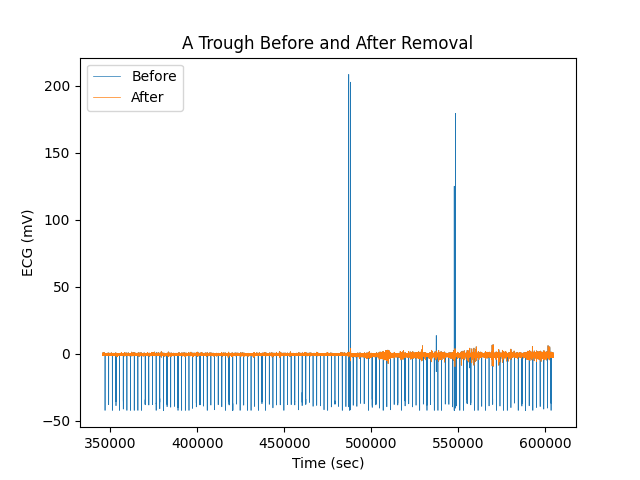

In [6]:
fig = plt.figure()
plt.plot(df["time"], raw_signal, color="C0", linewidth=0.5)
plt.plot(df["time"], signal, color="C1", linewidth=0.5)
plt.xlabel("Time (sec)")
plt.ylabel("ECG (mV)")
plt.title("A Trough Before and After Removal in Signal 1a")
plt.legend(["Before", "After"], loc="upper left")
plt.show()

In [4]:
# Figure 6: Zoomed in view of trough

In [5]:
# LOAD IN THE SIGNAL
df = pd.read_csv("C:/Users/aidan/Box/Deidentified-Raw-Waveforms/raw_waves_data_1a.csv", usecols=["time", "257"])

cols=["time", "257"]

# Complete the signal in the order of 257 (ECG1), then  258 (ECG2), and 
# then 317 (EG3), then ffill for remaining missing values
signal = pd.Series(df[cols[1]])
i=2
while True:
    try:
        signal = signal.combine_first(df[cols[i]])
        i+=1
    except IndexError:
        break
signal = signal.fillna(method="ffill")
signal = pd.to_numeric(signal)
print("Signals combined and filled in")

Signals combined and filled in


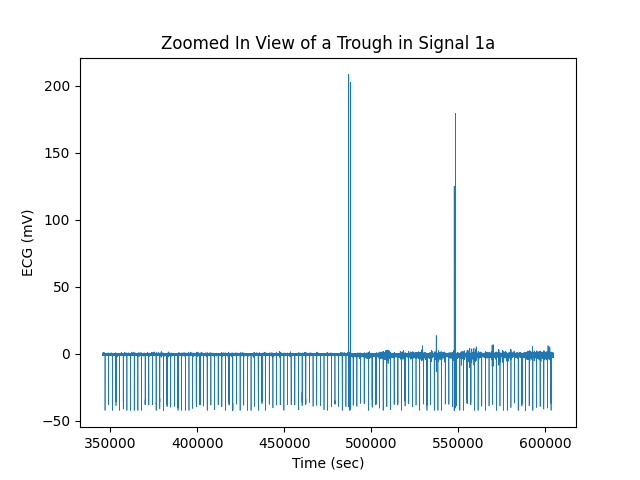

In [6]:
fig = plt.figure()
plt.plot(df["time"], signal, color="C0", linewidth=0.5)
plt.xlabel("Time (sec)")
plt.ylabel("ECG (mV)")
plt.title("Zoomed In View of a Trough in Signal 1a")
plt.show()

In [4]:
# Figure 5: A Signal with Troughs and Spikes

In [5]:
# LOAD IN THE SIGNAL
df = pd.read_csv("C:/Users/aidan/Box/Deidentified-Raw-Waveforms/raw_waves_data_1a.csv", usecols=["time", "257"])

cols=["time", "257"]

# Complete the signal in the order of 257 (ECG1), then  258 (ECG2), and 
# then 317 (EG3), then ffill for remaining missing values
signal = pd.Series(df[cols[1]])
i=2
while True:
    try:
        signal = signal.combine_first(df[cols[i]])
        i+=1
    except IndexError:
        break
signal = signal.fillna(method="ffill")
signal = pd.to_numeric(signal)
print("Signals combined and filled in")

Signals combined and filled in


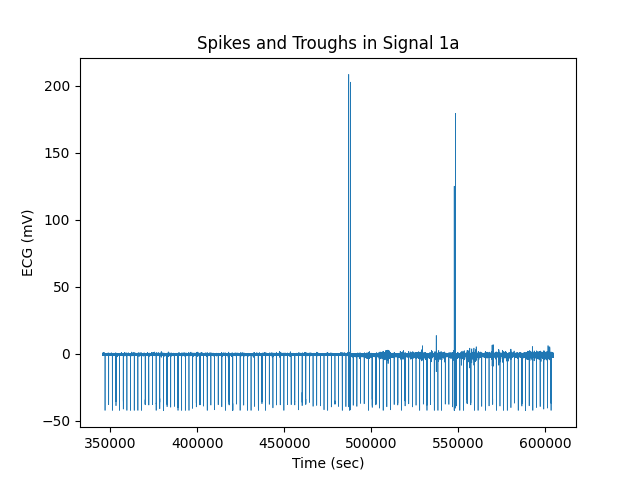

In [6]:
fig = plt.figure()
plt.plot(df["time"], signal, color="C0", linewidth=0.5)
plt.xlabel("Time (sec)")
plt.ylabel("ECG (mV)")
plt.title("Spikes and Troughs in Signal 1a")
plt.show()


In [4]:
# Figure 4: Heartbeat detection around a segment of flat data
# Let's look at signal 1a around a trough and show that the detection is a 
# success

In [5]:
# LOAD IN THE SIGNAL
df = pd.read_csv("C:/Users/aidan/Box/Deidentified-Raw-Waveforms/raw_waves_data_1a.csv", usecols=["time", "257"])

cols=["time", "257"]

# Complete the signal in the order of 257 (ECG1), then  258 (ECG2), and 
# then 317 (EG3), then ffill for remaining missing values
signal = pd.Series(df[cols[1]])
i=2
while True:
    try:
        signal = signal.combine_first(df[cols[i]])
        i+=1
    except IndexError:
        break
signal = signal.fillna(method="ffill")
signal = pd.to_numeric(signal)
print("Signals combined and filled in")

# Remove spikes and troughs by pinpointing values out of bounds and then 
# erasing left and right of those pinpoints by delta indices
delta = 125
filt = (signal <= -10) | (signal >= 10)
filt.loc[~filt] = np.nan
filt.fillna(method="ffill", limit=delta, inplace=True)
filt.fillna(method="bfill", limit=delta, inplace=True)
filt.fillna(value=False, inplace=True)

signal.loc[filt] = np.nan
signal.fillna(method="ffill", inplace=True)
print("Troughs and spikes removed")

collect_garbage()
print(virtual_memory())


Signals combined and filled in
Troughs and spikes removed
svmem(total=12655771648, available=7451930624, percent=41.1, used=5203841024, free=7451930624)


In [6]:
df["signal"] = signal

rpeaks_df = pd.read_csv("01-outputs/00-rpeaks/rpeaks_1a.csv")
rpeaks_df.set_index("Unnamed: 0", drop=True, inplace=True)

rpeaks_t = rpeaks_df["time"]
rpeaks_y = df.loc[ list(rpeaks_df.index), "signal" ]

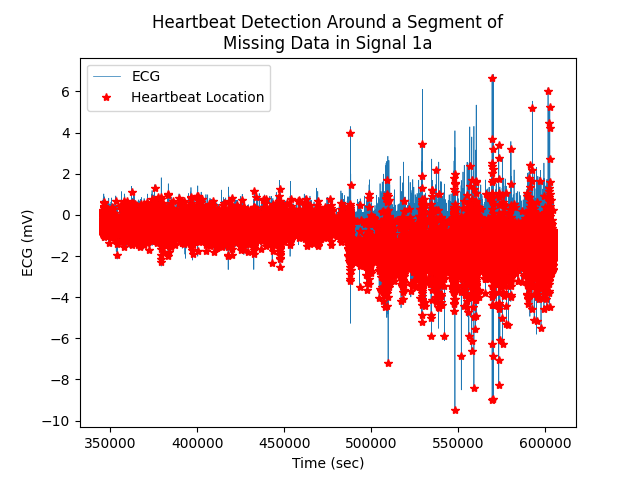

In [7]:
fig = plt.figure()
plt.plot(df["time"], df["signal"], color="C0", linewidth=0.5)
plt.plot(rpeaks_t, rpeaks_y, linewidth=0, marker="*", color="red")
plt.title("Heartbeat Detection Around a Segment of\nMissing Data in Signal 1a")
plt.xlabel("Time (sec)")
plt.ylabel("ECG (mV)")
plt.legend(["ECG", "Heartbeat Location"], loc="upper left")
plt.show()


In [4]:
# Figure 3: Example of the Multiple ECG Signals

In [5]:
df = pd.read_csv("C:/Users/aidan/Box/Deidentified-Raw-Waveforms/raw_waves_data_1d.csv", usecols=["time", "257", "258", "317"])
df.columns = ["time", "ecg1","ecg2","ecg3"]
virtual_memory()

svmem(total=12655771648, available=7175184384, percent=43.3, used=5480587264, free=7175184384)

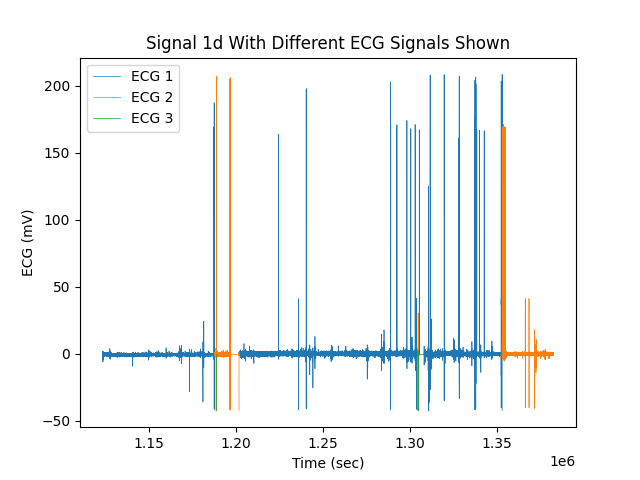

In [6]:
# Need to see the three signals side by side
fig = plt.figure()
plt.plot(df["time"], df["ecg1"], color="C0", linewidth=0.5)
plt.plot(df["time"], df["ecg2"], color="C1", linewidth=0.5)
plt.plot(df["time"], df["ecg3"], color="C2", linewidth=0.5)
plt.title("Signal 1d With Different ECG Signals Shown")
plt.xlabel("Time (sec)")
plt.ylabel("ECG (mV)")
plt.legend(["ECG 1", "ECG 2", "ECG 3"])
plt.show()

In [7]:
virtual_memory()

svmem(total=12655771648, available=6117117952, percent=51.7, used=6538653696, free=6117117952)